In [57]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import metrics
import matplotlib
import matplotlib.pyplot as plt #Visulization

from matplotlib import pyplot
matplotlib.rc('font',family = 'NanumGothicCoding')

from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection  import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.tree import export_graphviz
import graphviz

import statsmodels.formula.api as smf

#ignore warnings
import warnings
warnings.filterwarnings('ignore')




###
from pandas import set_option
from scipy import stats

In [58]:
df_raw = pd.read_csv("./data/BOSTON_HOUSING.csv", encoding = '949')
df_raw.head(10)

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.000000,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98
1,21.600000,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14
2,34.700001,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03
3,33.400002,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94
4,36.200001,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33
5,28.700001,0.02985,0.0,2.18,0,0.458,6.430,58.700001,6.0622,3,222,18.700001,394.119995,5.21
6,22.900000,0.08829,12.5,7.87,0,0.524,6.012,66.599998,5.5605,5,311,15.200000,395.600006,12.43
7,27.100000,0.14455,12.5,7.87,0,0.524,6.172,96.099998,5.9505,5,311,15.200000,396.899994,19.15
8,16.500000,0.21124,12.5,7.87,0,0.524,5.631,100.000000,6.0821,5,311,15.200000,386.630005,29.93
9,18.900000,0.17004,12.5,7.87,0,0.524,6.004,85.900002,6.5921,5,311,15.200000,386.709992,17.10


In [59]:
print(df_raw.shape)

(506, 14)


In [60]:
df_raw.dtypes

MEDV       float64
CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

In [61]:
df_raw.isnull().sum()

MEDV       0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [62]:
prices = df_raw['MEDV']

minimum_price = np.mean(prices)
maximum_price = np.max(prices)
mean_price = np.mean(prices)
median_price = np.median(prices)
std_price = np.std(prices)

print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${:,.2f}".format(minimum_price))
print("Maximum price: ${:,.2f}".format(maximum_price))
print("Mean price: ${:,.2f}".format(mean_price))
print("Median price ${:,.2f}".format(median_price))
print("Standard deviation of prices: ${:,.2f}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $22.53
Maximum price: $50.00
Mean price: $22.53
Median price $21.20
Standard deviation of prices: $9.19


In [63]:
df_raw['MEDV'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200001
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

In [64]:
df_raw.describe()

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.532806,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674030,12.653063
std,9.197104,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148862,2.105710,8.707259,168.537116,2.164946,91.294863,7.141062
min,5.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,17.025000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377487,6.950000
50%,21.200001,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440002,11.360000
75%,25.000000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.074999,5.188425,24.000000,666.000000,20.200001,396.225006,16.954999
max,50.000000,88.976196,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.899994,37.970001


In [65]:
# plt.figure(figsize=(15,15))
# sns.heatmap(data = df_raw.corr(), annot = True,
#            fmt = '.3f', linewidths = .8, cmap = 'Blues', square=True)

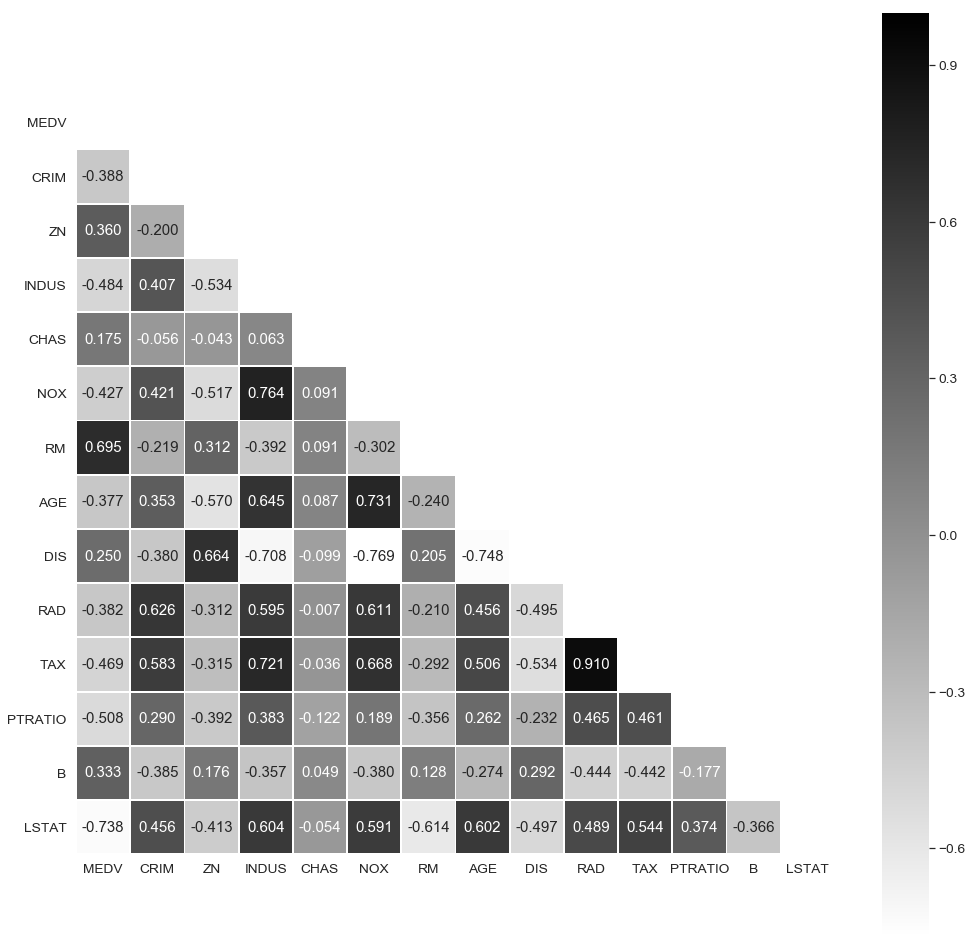

In [66]:
plt.figure(figsize=(17,17))
mask = np.zeros_like(df_raw.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(df_raw.corr(),fmt = '.3f', square = True, annot=True, linewidths=.9, cmap='gray_r', mask=mask)

['MEDV' 'LSTAT' 'RM' 'INDUS' 'NOX' 'TAX' 'CRIM' 'PTRATIO' 'AGE' 'DIS' 'ZN'
 'RAD' 'B' 'CHAS']


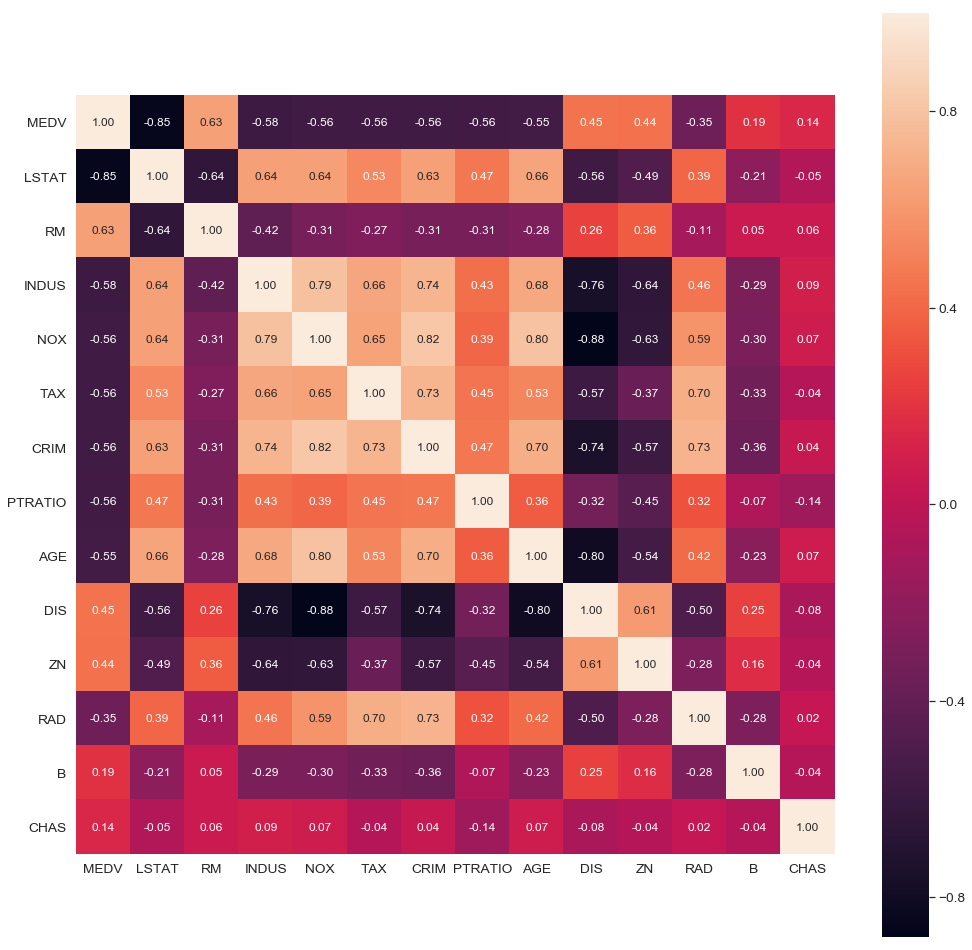

In [67]:
# correlation이 높은 상위 10개의 heatmap
# continuous + sequential variables --> spearman
# abs는 반비례관계도 고려하기 위함
import scipy as sp

cor_abs = abs(df_raw.corr(method='spearman')) 
cor_cols = cor_abs.nlargest(n=14, columns='MEDV').index # price과 correlation이 높은 column 10개 뽑기(내림차순)
# spearman coefficient matrix
cor = np.array(sp.stats.spearmanr(df_raw[cor_cols].values))[0] # 10 x 10
print(cor_cols.values)
plt.figure(figsize=(17,17))
sns.set(font_scale=1.25)
sns.heatmap(cor, fmt='.2f', annot=True, square=True , annot_kws={'size' : 12} ,xticklabels=cor_cols.values, yticklabels=cor_cols.values)

> - `RM, LSTAT, PTRATIO`, 은 0.5 이상이고
> - TAX, NOX, INDUS 는 0.4 이상
> - RAD, AGE, CRIME, ZN은 0.3 후반

- RM 은 이웃들간의 평균 적인 방의 수를 말함
- LSTAT 은 주변 이웃들 대비 저소득층을 말함
- PTRATIO 는 학생 교사 비율

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a20652b00>,
      dtype=object)

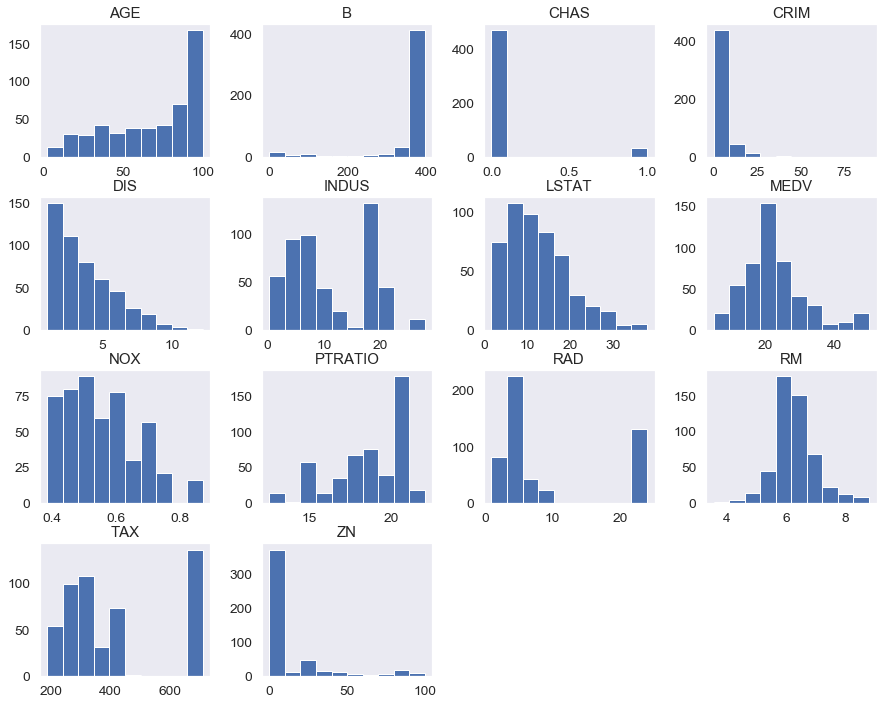

In [68]:
df_raw.hist(bins = 10, figsize = (15,12), grid = False)


> 1. PTRATIO 학생 교사 인구 값이 증가할 수록 MEDV 집값은 감소함 (반비례 상관관계)
> 2. RM 값이 증가하면 MEDV값도 증가하는 것을 확인 (선형 상관관계)
> 3. LSTAT 값이 가장 높을 때 MEDV 값이 가장 작음 (반비례 상관관계)

In [69]:
reg_model = smf.ols(formula = 'MEDV ~ CRIM + ZN + INDUS + NOX + RM + AGE + DIS + TAX + PTRATIO + LSTAT', data = df_raw)
reg_result = reg_model.fit()
print(reg_result.summary())


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     125.2
Date:                Wed, 08 May 2019   Prob (F-statistic):          1.16e-128
Time:                        06:56:31   Log-Likelihood:                -1521.1
No. Observations:                 506   AIC:                             3064.
Df Residuals:                     495   BIC:                             3111.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.9742      4.818      7.259      0.0

In [70]:
reg_result.resid.head()

0   -7.486751
1   -3.628734
2    3.585227
3    4.504594
4    8.019971
dtype: float64

In [71]:
reg_result.params

Intercept    34.974214
CRIM         -0.085104
ZN            0.040764
INDUS        -0.044000
NOX         -15.630794
RM            4.030198
AGE           0.001246
DIS          -1.517175
TAX          -0.000230
PTRATIO      -0.866601
LSTAT        -0.553649
dtype: float64

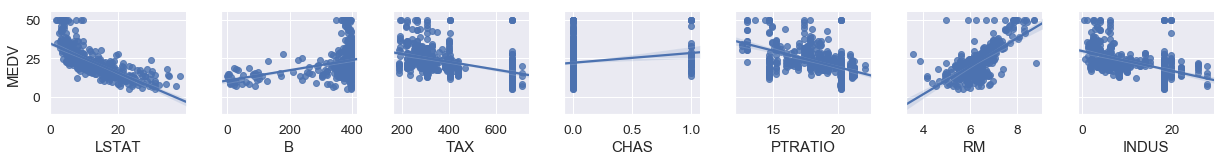

In [72]:
sns.pairplot(df_raw, y_vars='MEDV', x_vars=['LSTAT', 'B', 'TAX', 'CHAS', 'PTRATIO', 'RM', 'INDUS'], kind='reg')

> 집값은 RM(방의 수)이 증가하면 함께 증가하고
PTRATO, LASAT 저소득층 비율과 학생교사 비율이 증가하면 집값은 반대로 감소한다

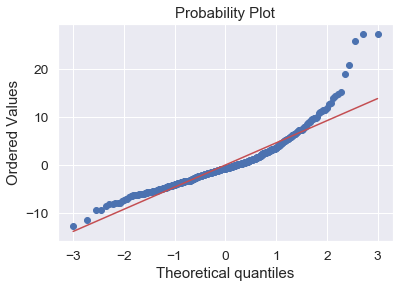

In [73]:
stats.probplot(reg_result.resid, plot=plt)
# res = stats.probplot(reg_result.resid, plot=plt)
plt.show()

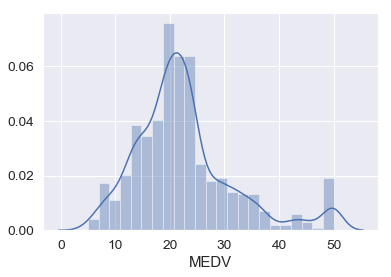

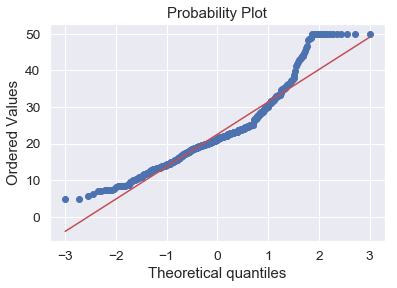

In [74]:
sns.distplot(df_raw['MEDV'], hist=True);
fig = plt.figure()
res = stats.probplot(df_raw['MEDV'], plot=plt)

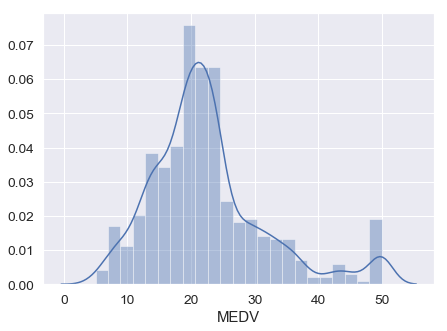

In [75]:
#histogram
f, ax = plt.subplots(figsize=(7,5))
sns.distplot(df_raw['MEDV'])

In [76]:
print("Skewness: %f" % df_raw['MEDV'].skew())
print("Kurtosis: %f" % df_raw['MEDV'].kurt())

Skewness: 1.108098
Kurtosis: 1.495197


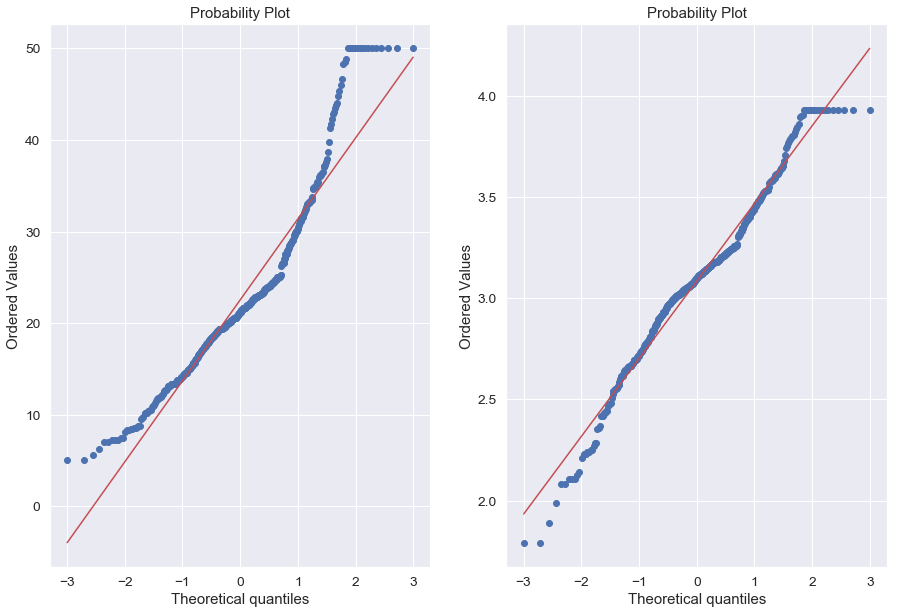

In [77]:
fig = plt.figure(figsize = (15,10))

fig.add_subplot(1,2,1)
res = stats.probplot(df_raw['MEDV'], plot=plt)

fig.add_subplot(1,2,2)
res = stats.probplot(np.log1p(df_raw['MEDV']), plot=plt)

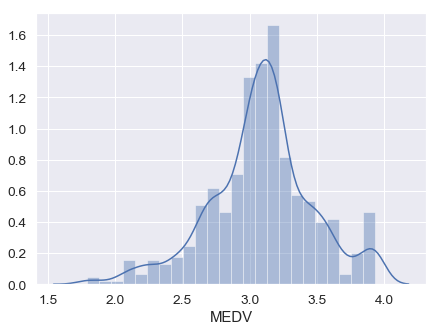

In [78]:
df_raw['MEDV'] = np.log1p(df_raw['MEDV'])
#histogram
f, ax = plt.subplots(figsize=(7,5))
sns.distplot(df_raw['MEDV'])

In [79]:
print("Skewness: %f" % df_raw['MEDV'].skew())
print("Kurtosis: %f" % df_raw['MEDV'].kurt())


Skewness: -0.241244
Kurtosis: 0.674053


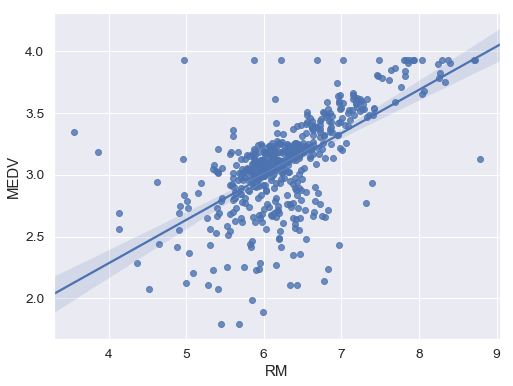

In [80]:
data = pd.concat([df_raw['MEDV'], df_raw['RM']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.regplot(x='RM', y="MEDV", data=data)

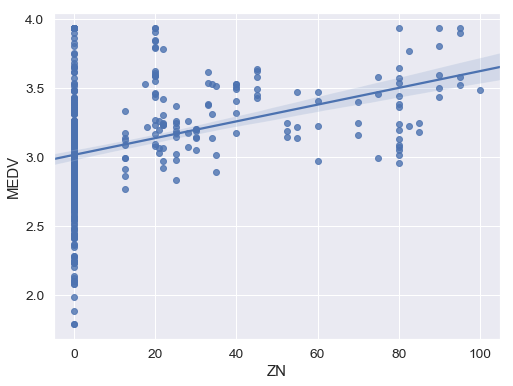

In [81]:
data = pd.concat([df_raw['MEDV'], df_raw['ZN']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.regplot(x='ZN', y="MEDV", data=data)

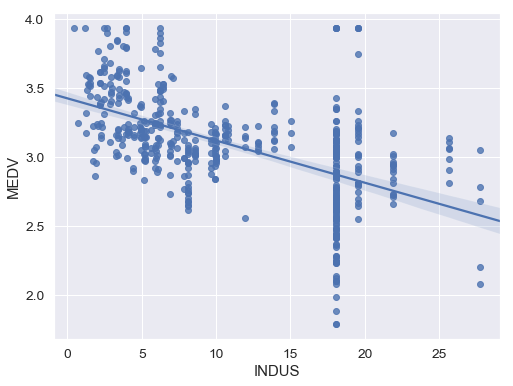

In [82]:
data = pd.concat([df_raw['MEDV'], df_raw['INDUS']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.regplot(x='INDUS', y="MEDV", data=data)

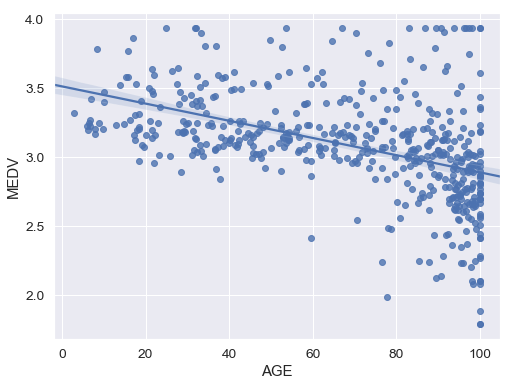

In [83]:
data = pd.concat([df_raw['MEDV'], df_raw['AGE']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.regplot(x='AGE', y="MEDV", data=data)

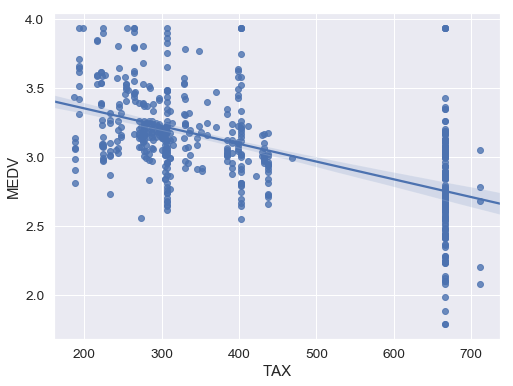

In [84]:
data = pd.concat([df_raw['MEDV'], df_raw['TAX']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.regplot(x='TAX', y="MEDV", data=data)

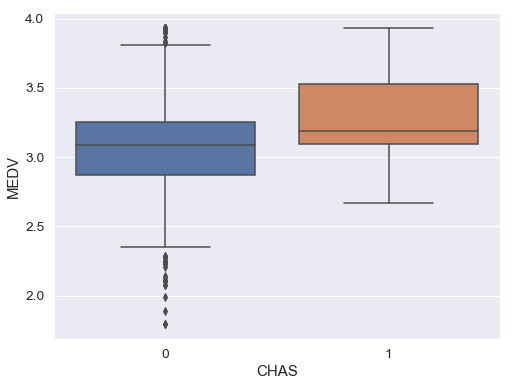

In [85]:
data = pd.concat([df_raw['MEDV'], df_raw['CHAS']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='CHAS', y="MEDV", data=data)

In [86]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

train_columns = [c for c in df_raw.columns if c not in ['MEDV']]

model = sm.OLS(df_raw['MEDV'].values, df_raw[train_columns])
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     6094.
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        06:56:36   Log-Likelihood:                -5.3528
No. Observations:                 506   AIC:                             36.71
Df Residuals:                     493   BIC:                             91.65
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0077      0.002     -4.469      0.0

In [87]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
df_sample = df_raw.drop(['MEDV'],axis = 1, inplace = False)

vif["Features"] = df_sample.columns
vif["VIF Values"] = [variance_inflation_factor(
    df_sample.values, i) for i in range(df_sample.shape[1])]

vif.sort_values(by='VIF Values',ascending=False)

,Features,VIF Values
10,PTRATIO,85.029542
5,RM,77.948284
4,NOX,73.894952
9,TAX,61.227274
6,AGE,21.386851
11,B,20.104943
8,RAD,15.167725
7,DIS,14.699652
2,INDUS,14.485759
12,LSTAT,11.102025


## data 분할

In [89]:
df_raw_y = df_raw['MEDV']
df_raw_x = df_raw.drop(['MEDV', 'CHAS', 'B', 'RAD'], axis = 1, inplace = False)
df_raw_x.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,LSTAT
0,0.00632,18.0,2.31,0.538,6.575,65.199997,4.0900,296,15.300000,4.98
1,0.02731,0.0,7.07,0.469,6.421,78.900002,4.9671,242,17.799999,9.14
2,0.02729,0.0,7.07,0.469,7.185,61.099998,4.9671,242,17.799999,4.03
3,0.03237,0.0,2.18,0.458,6.998,45.799999,6.0622,222,18.700001,2.94
4,0.06905,0.0,2.18,0.458,7.147,54.200001,6.0622,222,18.700001,5.33


In [90]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y
                                                               , test_size = 0.3, random_state = 1234)
print('train data X size : {}'.format(df_train_x.shape))
print('train data Y size : {}'.format(df_train_y.shape))
print('test data X size : {}'.format(df_test_x.shape))
print('test data Y size : {}'.format(df_test_y.shape))

train data X size : (354, 10)
train data Y size : (354,)
test data X size : (152, 10)
test data Y size : (152,)


In [91]:
# df_train_x, df_validation_x, df_train_y, df_validation_y = train_test_split(df_train_x, df_train_y
#                                                                , test_size = 0.4, random_state = 1234)
# print('train data X size : {}'.format(df_train_x.shape))
# print('train data Y size : {}'.format(df_train_y.shape))
# print('validation X size : {}'.format(df_validation_x.shape))
# print('validation Y size : {}'.format(df_validation_y.shape))

## 각각의 모델 평가

In [92]:
df_raw_x.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,LSTAT
0,0.00632,18.0,2.31,0.538,6.575,65.199997,4.0900,296,15.300000,4.98
1,0.02731,0.0,7.07,0.469,6.421,78.900002,4.9671,242,17.799999,9.14
2,0.02729,0.0,7.07,0.469,7.185,61.099998,4.9671,242,17.799999,4.03
3,0.03237,0.0,2.18,0.458,6.998,45.799999,6.0622,222,18.700001,2.94
4,0.06905,0.0,2.18,0.458,7.147,54.200001,6.0622,222,18.700001,5.33


In [93]:
models = []
models.append(('LR', LinearRegression()))
models.append(('DTR', DecisionTreeRegressor()))
models.append(('RF', RandomForestRegressor()))
models.append(('GB', GradientBoostingRegressor()))
models.append(('KNN', KNeighborsRegressor()))

In [94]:
LR = LinearRegression()
LR.fit(df_train_x, df_train_y)
pred_x = LR.predict(df_test_x)

print('<LinearRegression>')
print('Score on trainning set : {:.3f}'.format(LR.score(df_train_x, df_train_y)))
print('Score on test set : {:.3f}'.format(LR.score(df_test_x, df_test_y)))
print('mse : {:.3f}'.format(mean_squared_error(df_test_y, pred_x)))
print('mae : {:.3f}'.format(mean_absolute_error(df_test_y, pred_x)))

<LinearRegression>
Score on trainning set : 0.750
Score on test set : 0.780
mse : 0.038
mae : 0.145


In [130]:
LR

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [95]:
DTR = DecisionTreeRegressor(random_state = 1234)
DTR.fit(df_train_x, df_train_y)
pred_x = DTR.predict(df_test_x)

print('<DecisionTreeRegressor>')
print('Score on trainning set : {:.3f}'.format(DTR.score(df_train_x, df_train_y)))
print('Score on test set : {:.3f}'.format(DTR.score(df_test_x, df_test_y)))
print('mse : {:.3f}'.format(mean_squared_error(df_test_y, pred_x)))
print('mae : {:.3f}'.format(mean_absolute_error(df_test_y, pred_x)))

<DecisionTreeRegressor>
Score on trainning set : 1.000
Score on test set : 0.806
mse : 0.033
mae : 0.129


In [131]:
DTR

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1234, splitter='best')

In [96]:
RFR = RandomForestRegressor(random_state = 1234)
RFR.fit(df_train_x, df_train_y)
pred_x = RFR.predict(df_test_x)

print('<RandomForestRegressor>')
print('Score on trainning set : {:.3f}'.format(RFR.score(df_train_x, df_train_y)))
print('Score on test set : {:.3f}'.format(RFR.score(df_test_x, df_test_y)))
print('mse : {:.3f}'.format(mean_squared_error(df_test_y, pred_x)))
print('mae : {:.3f}'.format(mean_absolute_error(df_test_y, pred_x)))

<RandomForestRegressor>
Score on trainning set : 0.976
Score on test set : 0.839
mse : 0.028
mae : 0.111


In [132]:
RFR

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=1234, verbose=0, warm_start=False)

In [97]:
GBR = GradientBoostingRegressor(random_state = 1234)
GBR.fit(df_train_x, df_train_y)
pred_x = GBR.predict(df_test_x)

print('<GradientBoostingRegressor>')
print('Score on trainning set : {:.3f}'.format(GBR.score(df_train_x, df_train_y)))
print('Score on test set : {:.3f}'.format(GBR.score(df_test_x, df_test_y)))
print('mse : {:.3f}'.format(mean_squared_error(df_test_y, pred_x)))
print('mae : {:.3f}'.format(mean_absolute_error(df_test_y, pred_x)))

<GradientBoostingRegressor>
Score on trainning set : 0.971
Score on test set : 0.874
mse : 0.022
mae : 0.102


In [133]:
GBR

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=1234, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [98]:
RMS = 'neg_mean_squared_error'
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits = 10, random_state = 7)
    cv_results = cross_val_score(model, df_train_x, df_train_y, cv = kfold, scoring = RMS)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -0.038011 (0.012209)
DTR: -0.041550 (0.013615)
RF: -0.024818 (0.009123)
GB: -0.019119 (0.006213)
KNN: -0.050137 (0.011160)


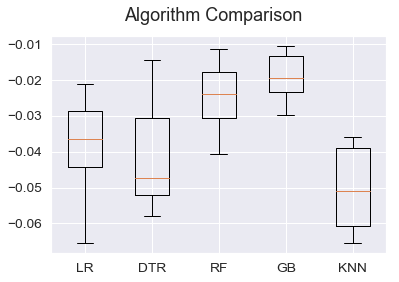

In [99]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [101]:
num_folds = 10
seed = 7
RMS = 'neg_mean_squared_error'
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
pipelines.append(('ScaledDTR', Pipeline([('Scaler', StandardScaler()),('DTR', DecisionTreeRegressor())])))
pipelines.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor())])))
pipelines.append(('ScaledGB', Pipeline([('Scaler', StandardScaler()),('GB', GradientBoostingRegressor())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))

results = []
names = []
for name, model in pipelines:
	kfold = KFold(n_splits=num_folds, random_state=seed)
	cv_results = cross_val_score(model, df_train_x, df_train_y, cv=kfold, scoring=RMS)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

ScaledLR: -0.038011 (0.012209)
ScaledDTR: -0.042780 (0.016045)
ScaledRF: -0.023975 (0.007607)
ScaledGB: -0.019102 (0.006142)
ScaledKNN: -0.027983 (0.006026)


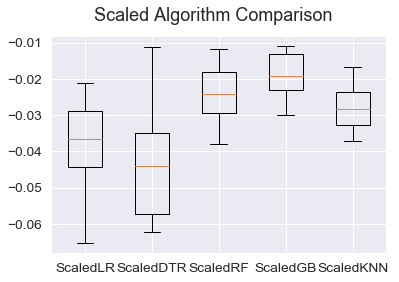

In [102]:
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [103]:
train_score = [];test_score=[]
para_leaf = [n_leaf * 1 for n_leaf in range(1,20)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeRegressor(random_state = 1234
                                ,min_samples_leaf = v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = test_score

In [104]:
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,1.000,0.806
1,2,0.978,0.809
2,3,0.960,0.818
3,4,0.945,0.806
4,5,0.922,0.792
5,6,0.911,0.791
6,7,0.901,0.796
7,8,0.887,0.785
8,9,0.882,0.778
9,10,0.874,0.777


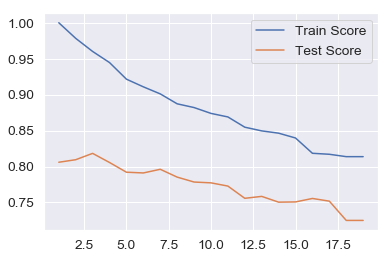

In [105]:
plt.plot(para_leaf, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_leaf, test_score, linestyle = '-', label = 'Test Score')
plt.legend()

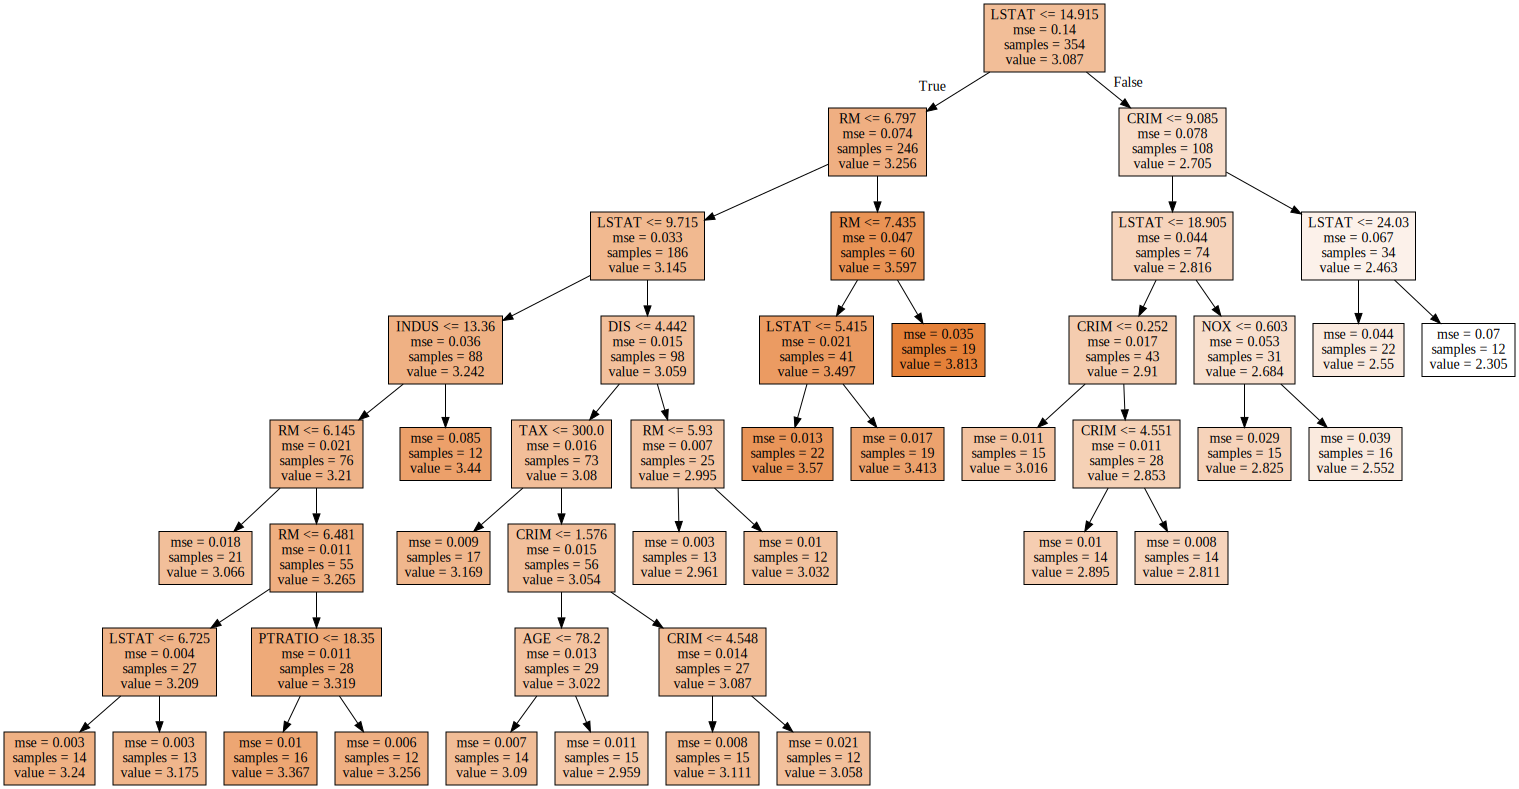

In [106]:
v_feature_names = df_train_x.columns

tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf = 12)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file = 'tree_leaf_A.dot',
               feature_names = v_feature_names, impurity = True, filled = True)

with open('tree_leaf_A.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

## splite

In [107]:
train_score = [];test_score=[]
para_split = [n_split * 2 for n_split in range(1,30)]

for v_min_samples_split in para_split:
    tree = DecisionTreeRegressor(random_state = 1234, min_samples_leaf = 11
                                ,min_samples_split = v_min_samples_split)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
df_score_split = pd.DataFrame()
df_score_split['MinSamplesSplite'] = para_split
df_score_split['TrainScore'] = train_score
df_score_split['TestScore'] = test_score
df_score_split.round(3)

,MinSamplesSplite,TrainScore,TestScore
0,2,0.869,0.773
1,4,0.869,0.773
2,6,0.869,0.773
3,8,0.869,0.773
4,10,0.869,0.773
5,12,0.869,0.773
6,14,0.869,0.773
7,16,0.869,0.773
8,18,0.869,0.773
9,20,0.869,0.773


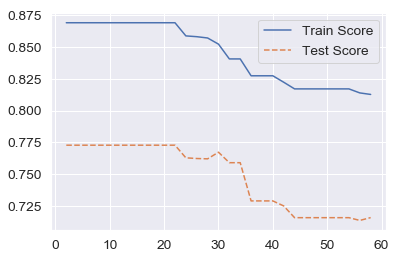

In [108]:
plt.plot(para_split, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_split, test_score, linestyle = '--', label = 'Test Score')
plt.legend()

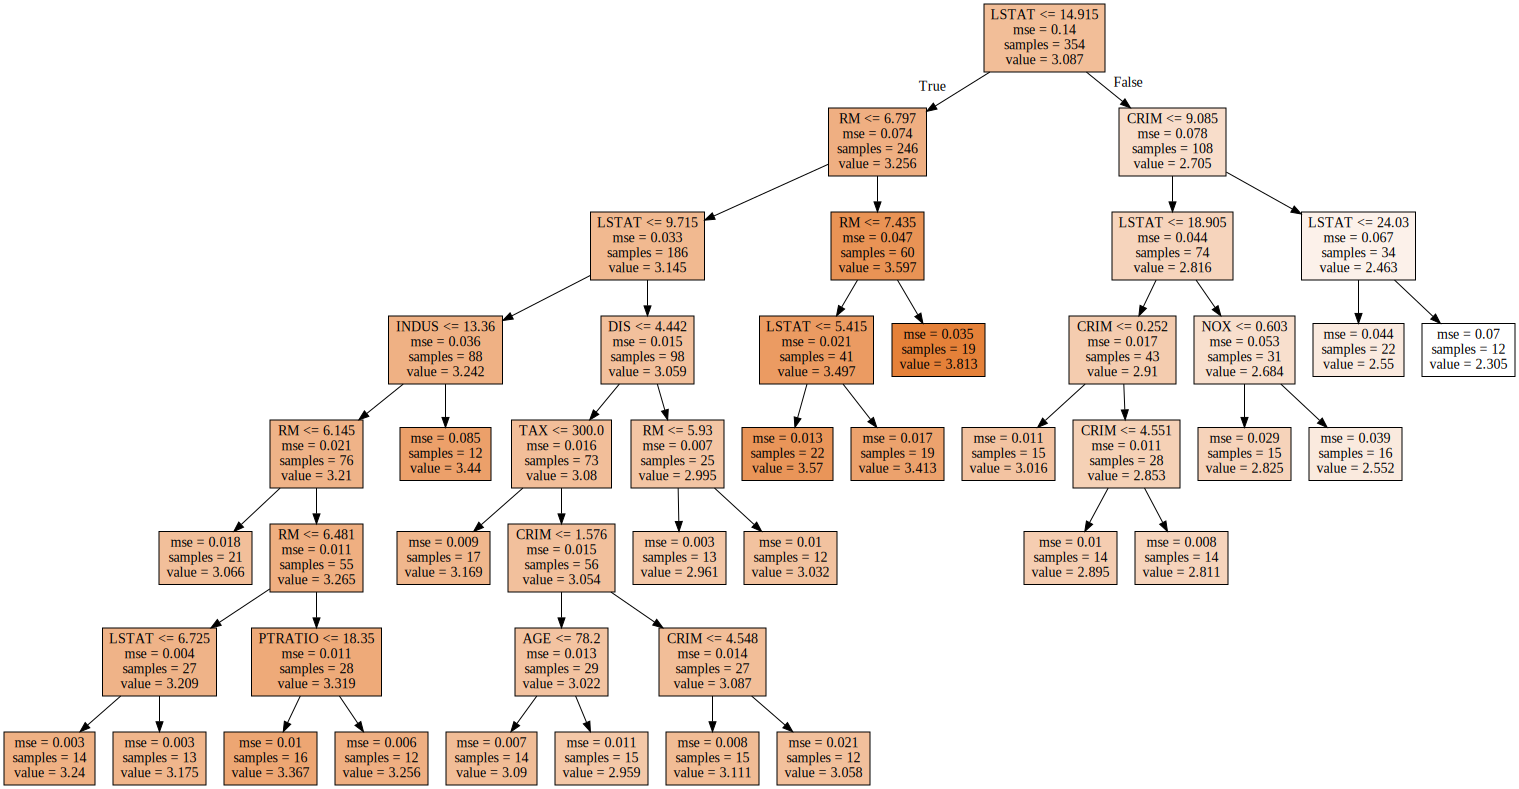

In [109]:
tree_graph = DecisionTreeRegressor(random_state = 1234, min_samples_leaf=12, min_samples_split = 22)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file = 'tree_split_A.dot',
               feature_names = v_feature_names, impurity = True, filled = True)
with open('tree_split_A.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [110]:
train_score = [];test_score=[]
para_depth = [depth for depth in range(1,20)]

for v_max_depth in para_depth:
    tree = DecisionTreeRegressor(random_state = 1234, min_samples_leaf = 12
                                ,min_samples_split = 22, max_depth = v_max_depth)
    
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
df_score_depth = pd.DataFrame()
df_score_depth['MinSamples_Depth'] = para_depth
df_score_depth['TrainScore'] = train_score
df_score_depth['TestScore'] = test_score
df_score_depth.round(3)

,MinSamples_Depth,TrainScore,TestScore
0,1,0.460,0.438
1,2,0.706,0.666
2,3,0.792,0.730
3,4,0.828,0.758
4,5,0.845,0.762
5,6,0.850,0.761
6,7,0.855,0.756
7,8,0.855,0.756
8,9,0.855,0.756
9,10,0.855,0.756


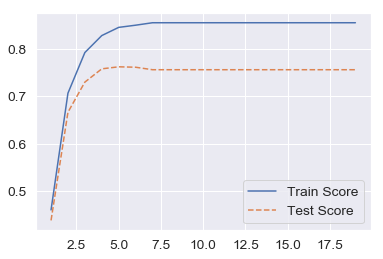

In [111]:
plt.plot(para_depth, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_depth, test_score, linestyle = '--', label = 'Test Score')
plt.legend()

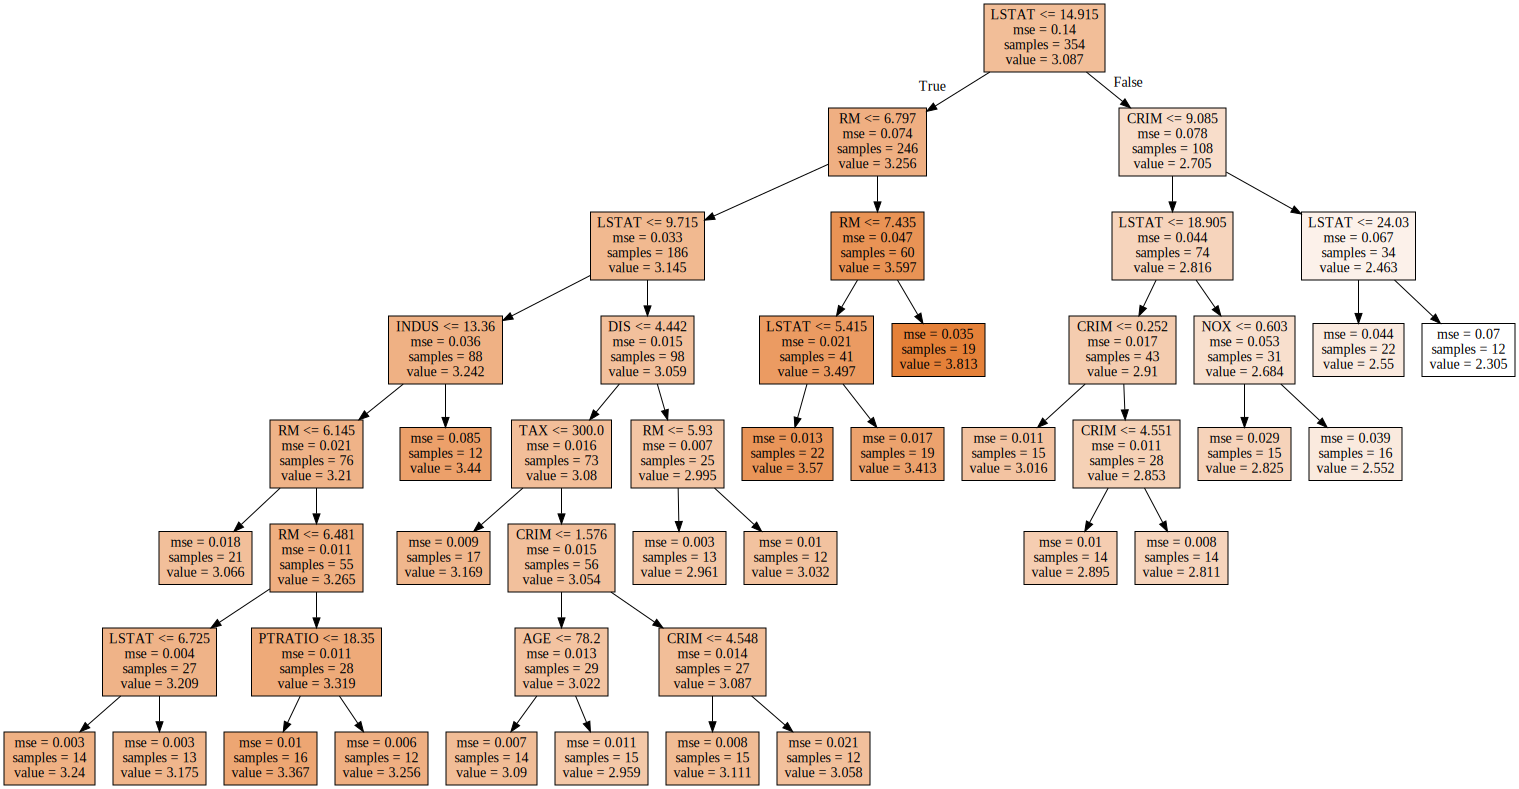

In [112]:
tree_graph = DecisionTreeRegressor(random_state = 1234, min_samples_leaf = 12, min_samples_split = 22, max_depth = 6)
tree_graph.fit(df_train_x, df_train_y)

export_graphviz(tree_graph, out_file = 'tree_depth_A.dot',
               feature_names = v_feature_names, impurity = True, filled = True)
with open('tree_split_A.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [113]:
tree_final = DecisionTreeRegressor(random_state = 1234, min_samples_leaf = 12, min_samples_split = 22, max_depth = 6)
tree_final.fit(df_train_x, df_train_y)

DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=12,
           min_samples_split=22, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1234, splitter='best')

In [114]:
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_names
df_importance['Importance'] = tree_final.feature_importances_

df_importance.sort_values('Importance', ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
9,LSTAT,0.618
4,RM,0.271
0,CRIM,0.078
3,NOX,0.014
2,INDUS,0.013
7,TAX,0.004
6,DIS,0.003
1,ZN,0.000
5,AGE,0.000
8,PTRATIO,0.000


Text(0, 0.5, '변수')

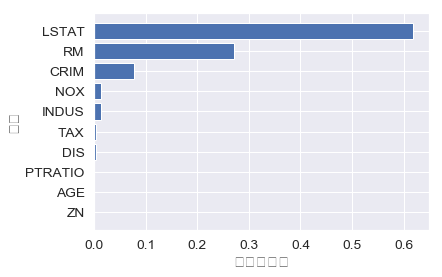

In [115]:
df_importance.sort_values('Importance', ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('변수중요도')
plt.ylabel('변수')

In [116]:
x_pred = tree_final.predict(df_test_x)
print('mse : {:.3f}'.format(mean_absolute_error(df_test_y, x_pred)))
print('mae : {:.3f}'.format(mean_squared_error(df_test_y, x_pred)))

mse : 0.139
mae : 0.041


In [117]:

print('Score on trainning set : {:.3f}'.format(tree_final.score(df_train_x, df_train_y)))
print('Score on test set : {:.3f}'.format(tree_final.score(df_test_x, df_test_y)))

Score on trainning set : 0.850
Score on test set : 0.761


In [118]:
models = []
models.append(('LR', LinearRegression()))
models.append(('DTR', DecisionTreeRegressor(random_state = 1234, min_samples_leaf = 12, min_samples_split = 22, max_depth = 6)))
models.append(('RF', RandomForestRegressor()))
models.append(('GB', GradientBoostingRegressor()))
models.append(('KNN', KNeighborsRegressor()))

In [119]:
RMS = 'neg_mean_squared_error'
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits = 10, random_state = 7)
    cv_results = cross_val_score(model, df_train_x, df_train_y, cv = kfold, scoring = RMS)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -0.038011 (0.012209)
DTR: -0.034845 (0.011027)
RF: -0.024160 (0.007304)
GB: -0.019018 (0.005999)
KNN: -0.050137 (0.011160)


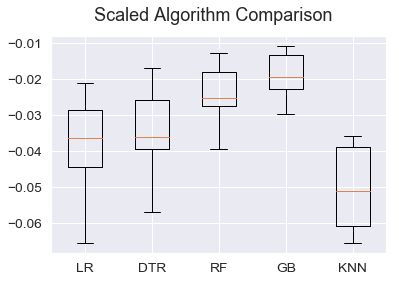

In [120]:
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [121]:
ensembles = []
ensembles.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
ensembles.append(('ScaledDTR', Pipeline([('Scaler', StandardScaler()),('DTR', DecisionTreeRegressor(random_state = 1234, min_samples_leaf = 12, min_samples_split = 22, max_depth = 6))])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor())])))
ensembles.append(('ScaledGB', Pipeline([('Scaler', StandardScaler()),('GB', GradientBoostingRegressor())])))
ensembles.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))

results = []
names = []
for name, model in ensembles:
	kfold = KFold(n_splits=num_folds, random_state=seed)
	cv_results = cross_val_score(model, df_train_x, df_train_y, cv=kfold, scoring=RMS)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

ScaledLR: -0.038011 (0.012209)
ScaledDTR: -0.034845 (0.011027)
ScaledRF: -0.025484 (0.005815)
ScaledGB: -0.019153 (0.006121)
ScaledKNN: -0.027983 (0.006026)


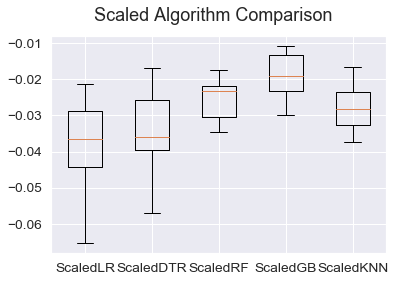

In [122]:
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [123]:
scaler = StandardScaler().fit(df_train_x)
rescaledX = scaler.transform(df_train_x)
param_grid = dict(n_estimators=np.array([50,100,150,200,250,300,350,400]))
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=RMS, cv=kfold)
grid_result = grid.fit(rescaledX, df_train_y)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.018843 using {'n_estimators': 150}
-0.020437 (0.005776) with: {'n_estimators': 50}
-0.019031 (0.006059) with: {'n_estimators': 100}
-0.018843 (0.006618) with: {'n_estimators': 150}
-0.019058 (0.007030) with: {'n_estimators': 200}
-0.019058 (0.007133) with: {'n_estimators': 250}
-0.019148 (0.007194) with: {'n_estimators': 300}
-0.019209 (0.007290) with: {'n_estimators': 350}
-0.019326 (0.007367) with: {'n_estimators': 400}


In [135]:
# prepare the model
scaler = StandardScaler().fit(df_train_x)
rescaledX = scaler.transform(df_train_x)
model = GradientBoostingRegressor(random_state=seed, n_estimators=400)
model.fit(rescaledX, df_train_y)

# transform the validation dataset
rescaledValidationX = scaler.transform(df_test_x)
predictions = model.predict(rescaledValidationX)
print('mse : {:.3f}'.format(mean_squared_error(df_test_y, predictions)))
print('mae : {:.3f}'.format(mean_absolute_error(df_test_y, predictions)))

mse : 0.021
mae : 0.100


In [134]:
# prepare the model
scaler = StandardScaler().fit(df_train_x)
rescaledX = scaler.transform(df_train_x)
model = GradientBoostingRegressor(random_state=seed, n_estimators=150)
model.fit(rescaledX, df_train_y)

# transform the validation dataset
rescaledValidationX = scaler.transform(df_test_x)
predictions = model.predict(rescaledValidationX)
print('mse : {:.3f}'.format(mean_squared_error(df_test_y, predictions)))
print('mae : {:.3f}'.format(mean_absolute_error(df_test_y, predictions)))

mse : 0.021
mae : 0.100


In [126]:
print('R^2:',metrics.r2_score(df_test_y, predictions))
print('Adjusted R^2:',1 - (1-metrics.r2_score(df_test_y, predictions))*(len(df_train_y)-1)/(len(df_train_y)-df_train_x.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(df_test_y, predictions))
print('MSE:',metrics.mean_squared_error(df_test_y, predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(df_test_y, predictions)))

R^2: 0.8715889302630733
Adjusted R^2: 0.8678451672969821
MAE: 0.10480862208824251
MSE: 0.022091054568413943
RMSE: 0.14863059768571862


In [127]:
# lr = LinearRegression()
# lr.fit(df_train_x, df_train_y)

# print('Score on trainning set : {:.3f}'.format(lr.score(df_train_x, df_train_y)))
# print('Score on test set : {:.3f}'.format(lr.score(df_test_x, df_train_y)))

In [128]:
# y_pred = lr.predict(df_train_x)

In [129]:
# print('R^2:',metrics.r2_score(df_train_y, y_pred))
# print('Adjusted R^2:',1 - (1-metrics.r2_score(df_train_y, y_pred))*(len(df_train_y)-1)/(len(df_train_y)-df_train_x.shape[1]-1))
# print('MAE:',metrics.mean_absolute_error(df_train_y, y_pred))
# print('MSE:',metrics.mean_squared_error(df_train_y, y_pred))
# print('RMSE:',np.sqrt(metrics.mean_squared_error(df_train_y, y_pred)))